***<div align="center">Task 1: Data Preprocessing and Exploratory Data Analysis (EDA)</div>***

In [37]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Load the Dataset
file_path = "hotel_bookings.csv"
hotel_data = pd.read_csv(file_path)

In [39]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [40]:
# 1. Overview of the Dataset
print("Dataset Shape:", hotel_data.shape)

Dataset Shape: (119390, 32)


In [41]:
print("\nDataset Info:")
print(hotel_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  m

In [42]:
print("\nMissing Values:\n", hotel_data.isnull().sum())


Missing Values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              1634

In [43]:
print("\nDescriptive Statistics:\n", hotel_data.describe(include='all'))


Descriptive Statistics:
              hotel    is_canceled      lead_time  arrival_date_year  \
count       119390  119390.000000  119390.000000      119390.000000   
unique           2            NaN            NaN                NaN   
top     City Hotel            NaN            NaN                NaN   
freq         79330            NaN            NaN                NaN   
mean           NaN       0.370416     104.011416        2016.156554   
std            NaN       0.482918     106.863097           0.707476   
min            NaN       0.000000       0.000000        2015.000000   
25%            NaN       0.000000      18.000000        2016.000000   
50%            NaN       0.000000      69.000000        2016.000000   
75%            NaN       1.000000     160.000000        2017.000000   
max            NaN       1.000000     737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count              119390             119390.000000   
unique     

In [44]:
# 2. Handle Missing Values
hotel_data = hotel_data.drop(columns=['company'], axis=1)  # Drop 'company' due to high missing values

In [45]:
hotel_data['agent'] = hotel_data['agent'].fillna('Unknown')
hotel_data['country'] = hotel_data['country'].fillna(hotel_data['country'].mode()[0])
hotel_data['children'] = hotel_data['children'].fillna(0)

In [46]:
# Verify missing values are addressed
print("\nMissing Values after cleaning:\n", hotel_data.isnull().sum())


Missing Values after cleaning:
 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                            

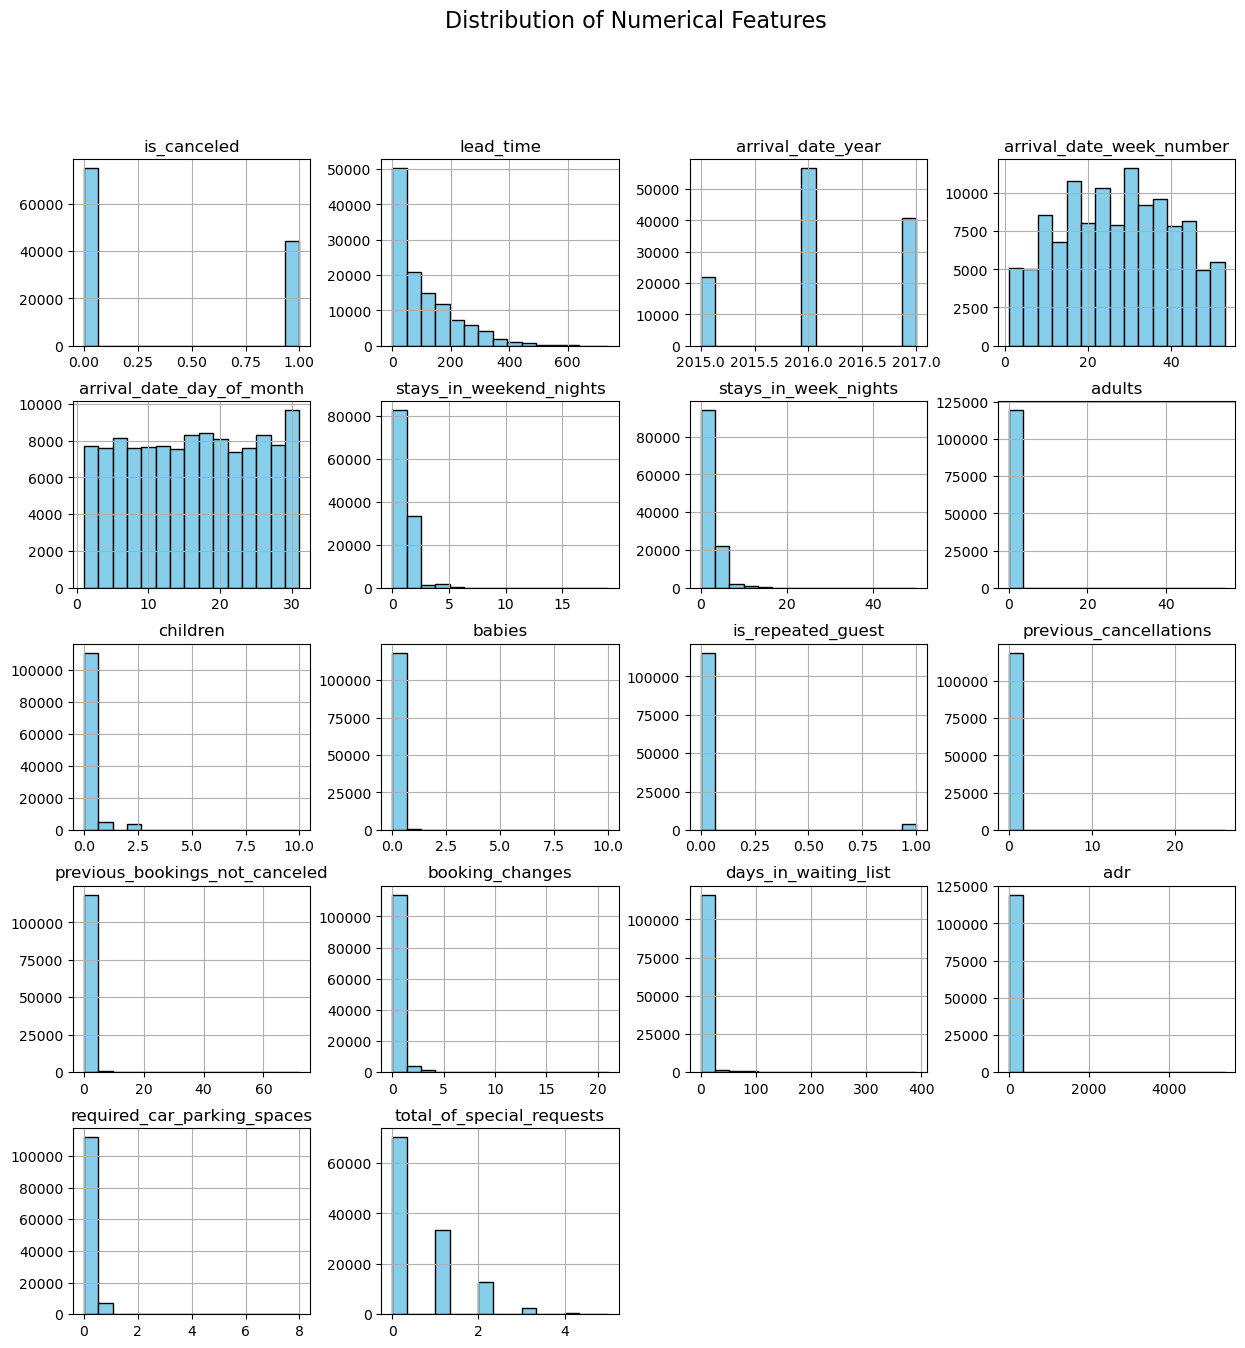

In [47]:
# 3. Numerical Features Distribution
numerical_columns = hotel_data.select_dtypes(include=np.number).columns
hotel_data[numerical_columns].hist(bins=15, figsize=(15, 15), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

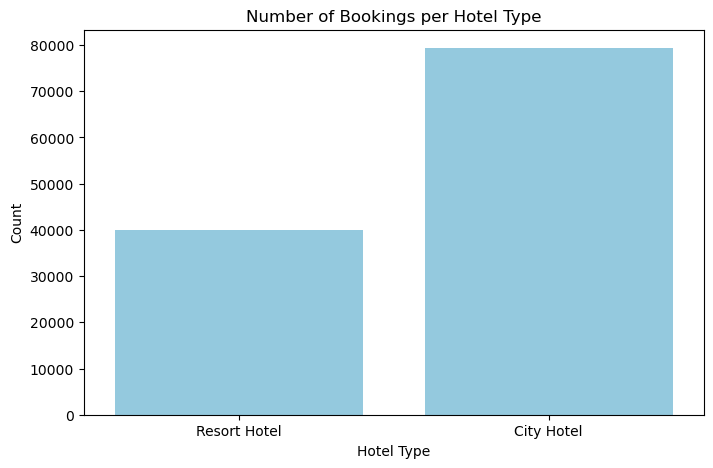

In [48]:
# 4. Categorical Features Analysis
plt.figure(figsize=(8, 5))
sns.countplot(data=hotel_data, x='hotel', color='skyblue')  # Use a single color for the bars
plt.title('Number of Bookings per Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

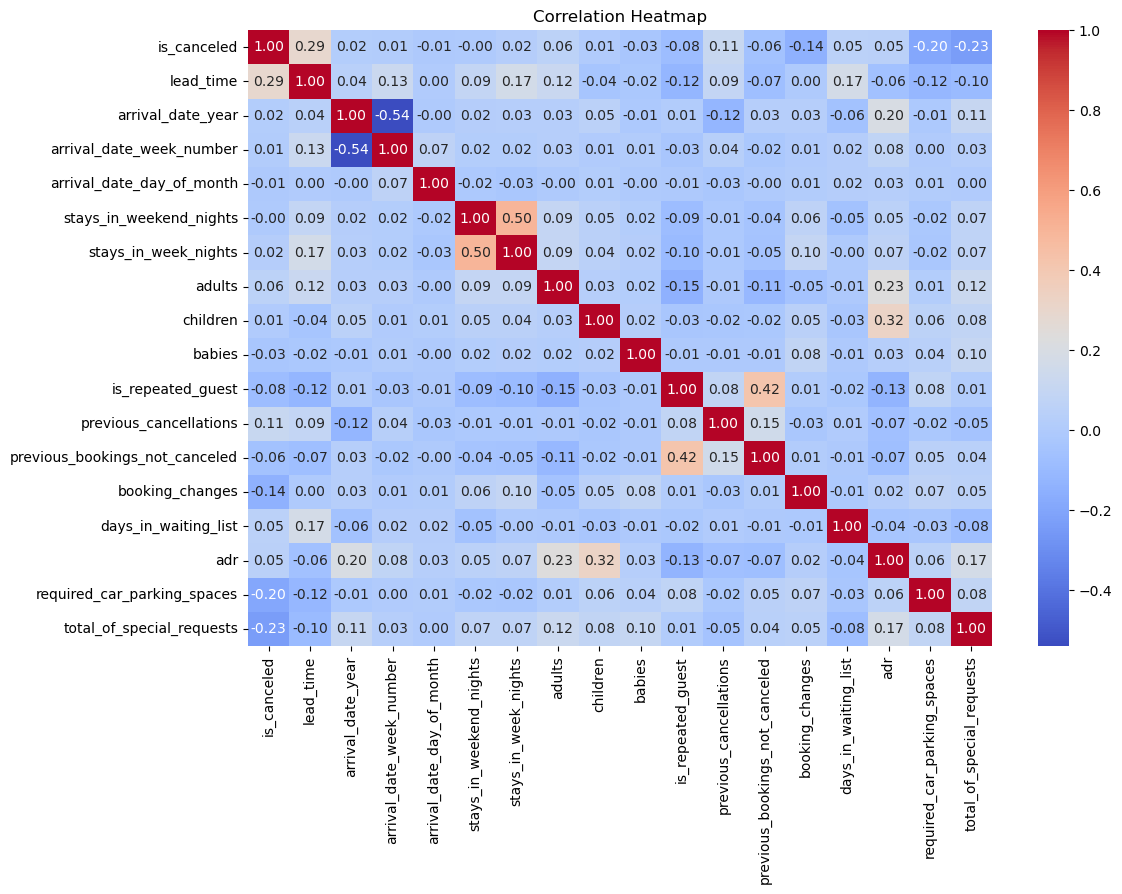

In [49]:
# 5. Correlation Heatmap
plt.figure(figsize=(12, 8))
numerical_data = hotel_data.select_dtypes(include=[np.number])
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

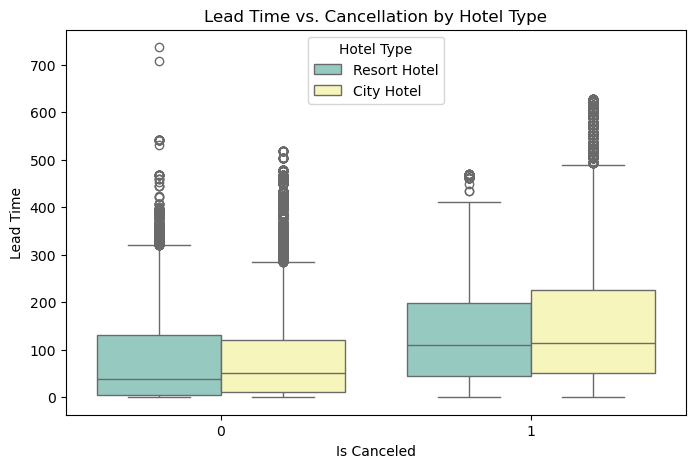

In [50]:
# 6. Key Relationship Example (e.g., Lead Time vs. Cancellations)
plt.figure(figsize=(8, 5))
sns.boxplot(data=hotel_data, x='is_canceled', y='lead_time', hue='hotel', palette='Set3')  # Group by 'hotel'
plt.title("Lead Time vs. Cancellation by Hotel Type")
plt.xlabel("Is Canceled")
plt.ylabel("Lead Time")
plt.legend(title='Hotel Type')
plt.show()

*******************************************************************************************************************************************

### Summary and Conclusions for Task 1: Data Preprocessing and EDA ###


#### **Steps Taken**
1. **Data Cleaning**:
   - Addressed missing values:
     - Dropped the `company` column due to 94% missing data.
     - Filled missing `agent` values with "Unknown."
     - Imputed missing `country` values with the most frequent value (`'PRT'` in this case).
     - Replaced missing `children` values with `0`.
   - Verified no remaining missing data.

2. **Exploratory Data Analysis**:
   - **Distributions**:
     - Most bookings were from the **City Hotel** compared to the **Resort Hotel**.
     - Variables like `lead_time`, `stays_in_week_nights`, and `adr` (average daily rate) showed significant variability.
   - **Correlation Analysis**:
     - Computed a heatmap for numerical features.
     - Key positive correlations:
       - `lead_time` and `is_canceled`: Longer lead times tend to have higher cancellation rates.
       - `total_special_requests` and `adr`: Guests with more requests often pay higher rates.
   - **Key Relationships**:
     - `Lead Time vs. Cancellations`:
       - Guests with longer lead times are more likely to cancel bookings.
     - `Hotel Type Analysis`:
       - City Hotels had significantly more bookings compared to Resort Hotels.
     - **Special Requests**: Guests with many special requests tend to not cancel.